下面是一个电商订单数据的示例，以及使用 Python 中的 NumPy、Pandas 和 Seaborn 进行数据分析的步骤。

### 1. 模拟数据

首先，我们可以使用 NumPy 生成一些模拟的电商订单数据。

In [1]:
import numpy as np
import pandas as pd

# 设置随机种子以便复现
np.random.seed(42)

# 模拟电商订单数据
n_orders = 1000
order_data = {
    'order_id': np.arange(1, n_orders + 1),
    'amount': np.random.gamma(shape=2, scale=50, size=n_orders).round(2),  # 模拟订单金额
    'quantity': np.random.poisson(lam=3, size=n_orders),  # 模拟购买数量
    'category': np.random.choice(['Electronics', 'Clothing', 'Home', 'Books'], n_orders)  # 商品分类
}

df = pd.DataFrame(order_data)

In [4]:
df.head()

,order_id,amount,quantity,category
0,1,119.68,3,Books
1,2,74.72,2,Clothing
2,3,69.11,0,Clothing
3,4,69.12,1,Books
4,5,232.49,1,Books


### 2. 数据集中度分析

计算平均值、中位数和众数。

In [3]:
# 平均值
mean_amount = df['amount'].mean()
# 中位数
median_amount = df['amount'].median()
# 众数
mode_amount = df['amount'].mode()[0]  # 众数可能有多个，取第一个

print(f"平均值: {mean_amount}, 中位数: {median_amount}, 众数: {mode_amount}")

平均值: 102.99649, 中位数: 86.45500000000001, 众数: 4.36



### 3. 数据离散程度分析

计算方差、标准差和离散系数。

In [5]:
# 方差
variance_amount = df['amount'].var()
# 标准差
std_dev_amount = df['amount'].std()
# 离散系数
cv_amount = std_dev_amount / mean_amount

print(f"方差: {variance_amount}, 标准差: {std_dev_amount}, 离散系数: {cv_amount}")

方差: 4920.029546126026, 标准差: 70.14292228105431, 离散系数: 0.6810224531054827



### 4. 数据分布形态

使用 Z-score 判断数据是否偏态。

In [6]:
# 计算 Z-score
z_scores = (df['amount'] - mean_amount) / std_dev_amount
df['z_score'] = z_scores

# 判断偏态
left_skewed = (z_scores[z_scores < -1].count() > z_scores[z_scores > 1].count())
right_skewed = (z_scores[z_scores > 1].count() > z_scores[z_scores < -1].count())

print(f"左偏: {left_skewed}, 右偏: {right_skewed}")


左偏: False, 右偏: True



### 5. 数据相关性

计算 Pearson 相关系数。

In [8]:
# 计算相关系数
correlation_matrix = df[['amount', 'quantity']].corr(method='pearson')

print("相关性矩阵:")
print(correlation_matrix)

# 获取相关系数值
pearson_coefficient = correlation_matrix.loc['amount', 'quantity']
print(f"订单金额与购买数量的 Pearson 相关系数: {pearson_coefficient}")

相关性矩阵:
            amount  quantity
amount    1.000000  0.020442
quantity  0.020442  1.000000
订单金额与购买数量的 Pearson 相关系数: 0.020441895767173385


### 6. 可视化数据分布

使用 Seaborn 可视化订单金额的分布。

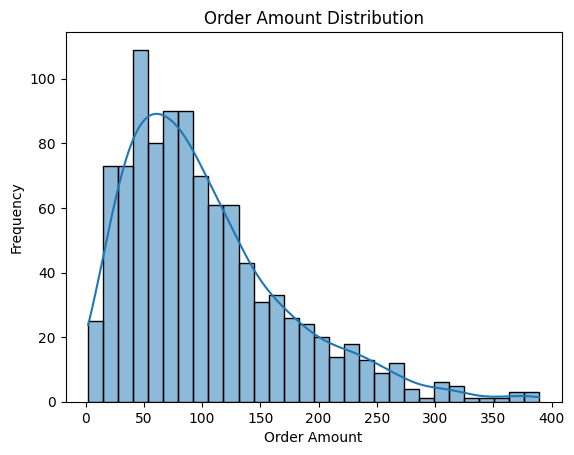

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['amount'], bins=30, kde=True)
plt.title('Order Amount Distribution')
plt.xlabel('Order Amount')
plt.ylabel('Frequency')
plt.show()